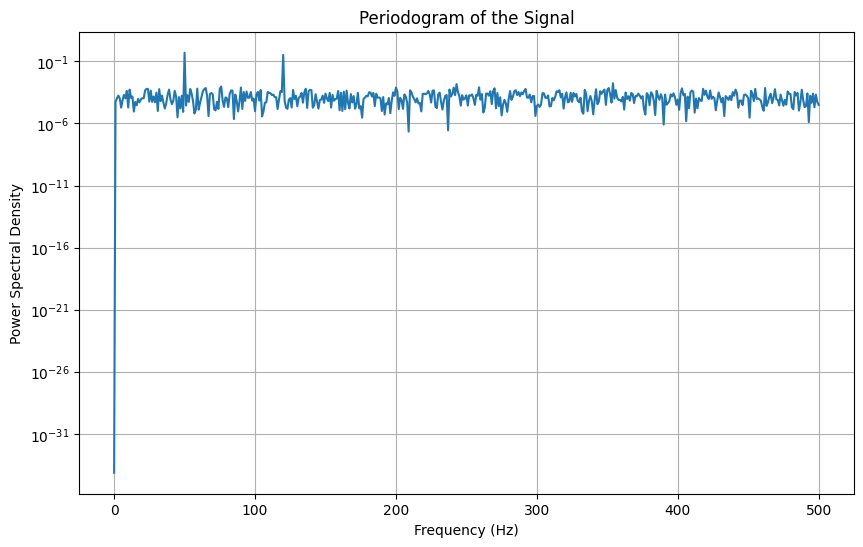

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector for 1 second

# Generate a sample signal: a mix of two sine waves with added noise
freq1 = 50   # Frequency of the first sine wave (Hz)
freq2 = 120  # Frequency of the second sine wave (Hz)
signal = (np.sin(2 * np.pi * freq1 * t) +
          0.5 * np.sin(2 * np.pi * freq2 * t) +
          0.3 * np.random.randn(len(t)))  # Added white noise

# Calculate the periodogram
frequencies, power_spectrum = periodogram(signal, fs=fs)

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)  # semilogy for better visualization of the spectrum
plt.title('Periodogram of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

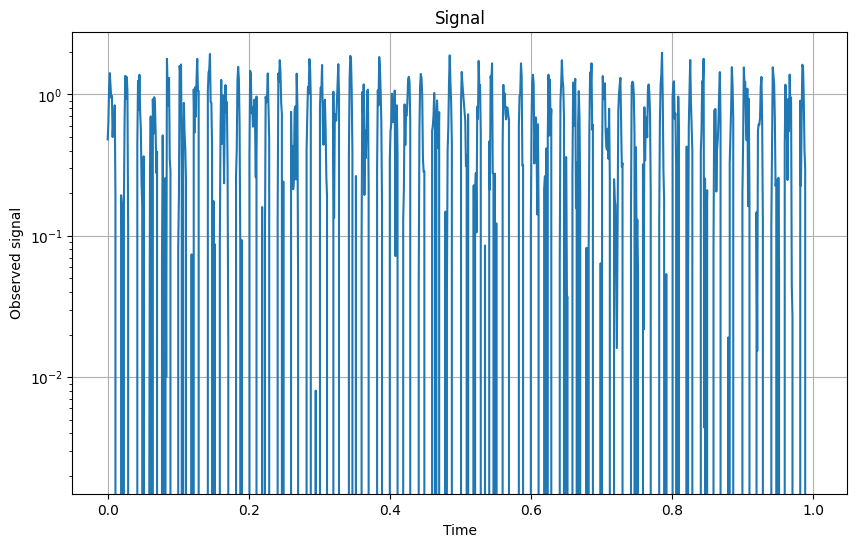

In [2]:
# Plot the series
plt.figure(figsize=(10, 6))
plt.semilogy(t, signal) 
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Observed signal')
plt.grid(True)
plt.show()

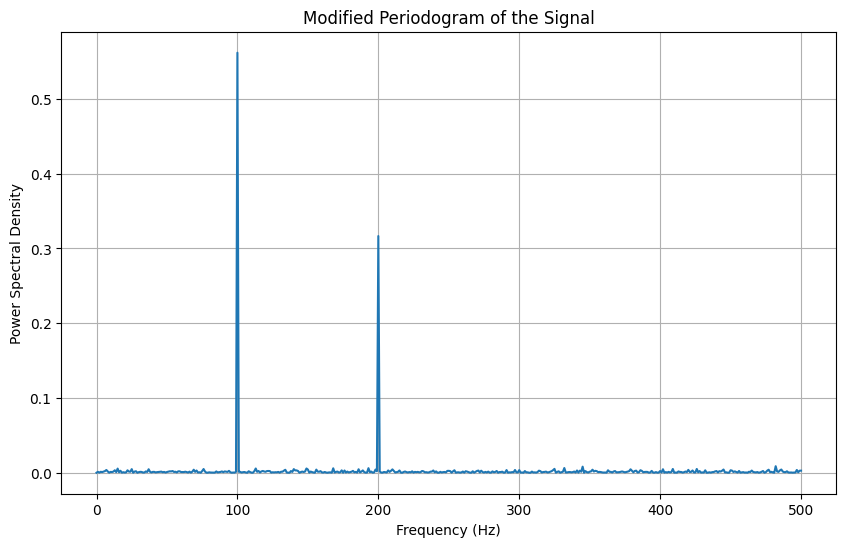

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector for 1 second

# Generate a sample signal: a mix of two sine waves with added noise
freq1 = 100   # Frequency of the first sine wave (Hz)
freq2 = 200  # Frequency of the second sine wave (Hz)
signal = (np.sin(2 * np.pi * freq1 * t) +
          0.8 * np.sin(2 * np.pi * freq2 * t) +
          0.8 * np.random.randn(len(t)))  # Added white noise

# Calculate the periodogram
frequencies, power_spectrum = periodogram(signal, fs=fs)

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum)  # semilogy for better visualization of the spectrum
plt.title('Modified Periodogram of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.show()

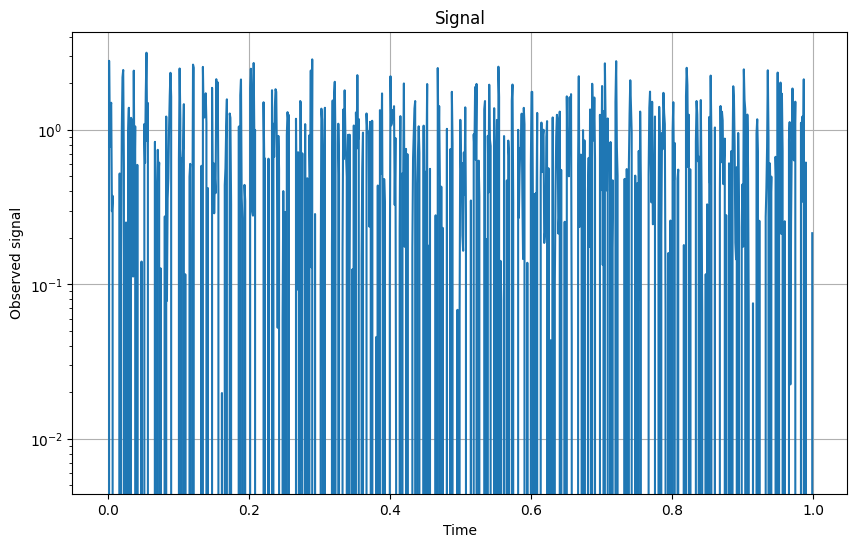

In [ ]:
# Plot the series
plt.figure(figsize=(10, 6))
plt.semilogy(t, signal) 
plt.title('Modified Signal')
plt.xlabel('Time')
plt.ylabel('Observed signal')
plt.grid(True)
plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Charger les données
df = pd.read_excel(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 1\Data\dados_A521_D_2010-01-01_2025-01-01.xlsx", 
                   usecols="A:C", parse_dates=["DATA"])

# Vérifier les noms des colonnes
print(df.columns)

# S'assurer que la colonne 'DATA' est triée
df = df.sort_values(by="DATA")

# Convertir la température en valeurs numériques (au cas où il y aurait des valeurs manquantes ou du texte)
df["TEMPERATURA"] = pd.to_numeric(df["TEMPERATURA"], errors='coerce')
df = df.dropna(subset=["TEMPERATURA"])  # Supprimer les NaN

df

Index(['DATA', 'PRECIPITACAO', 'TEMPERATURA'], dtype='object')


,DATA,PRECIPITACAO,TEMPERATURA
0,2010-01-01,32.4,22.2
1,2010-01-02,5.4,24.0
2,2010-01-03,0.0,24.9
3,2010-01-04,0.0,24.4
4,2010-01-05,19.8,23.7
...,...,...,...
5475,2024-12-28,10.8,21.7
5476,2024-12-29,35.2,20.0
5477,2024-12-30,14.0,21.2
5478,2024-12-31,0.2,21.9


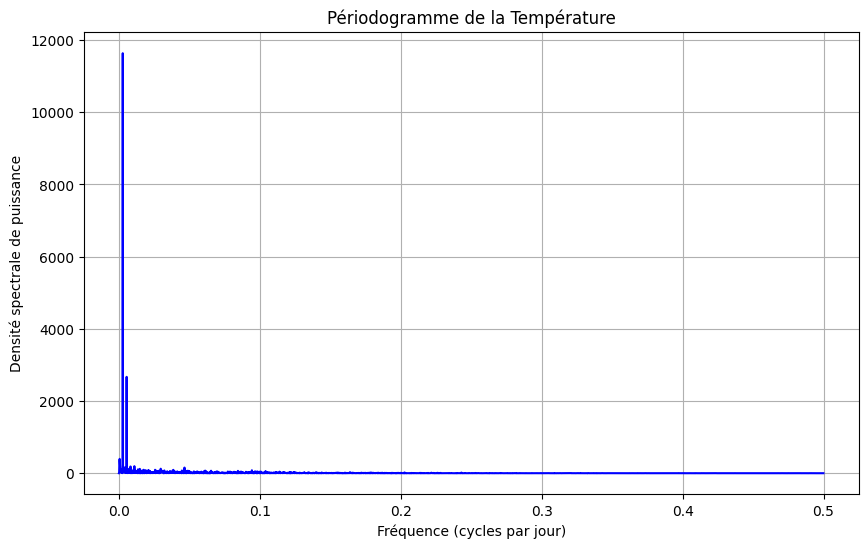

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram


# Déterminer la fréquence d'échantillonnage en fonction des dates
df["delta_time"] = df["DATA"].diff().dt.days  # Différence en jours entre les mesures
fs = 1 / df["delta_time"].median()  # Fréquence d'échantillonnage moyenne en jours⁻¹

# Calculer le périodogramme
frequencies, power_spectrum = periodogram(df["TEMPERATURA"], fs=fs)

# Tracer le périodogramme
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum, color='b')
plt.title('Périodogramme de la Température')
plt.xlabel('Fréquence (cycles par jour)')
plt.ylabel('Densité spectrale de puissance')
plt.grid(True)
plt.show()

Index(['DATA', 'IPCA'], dtype='object')


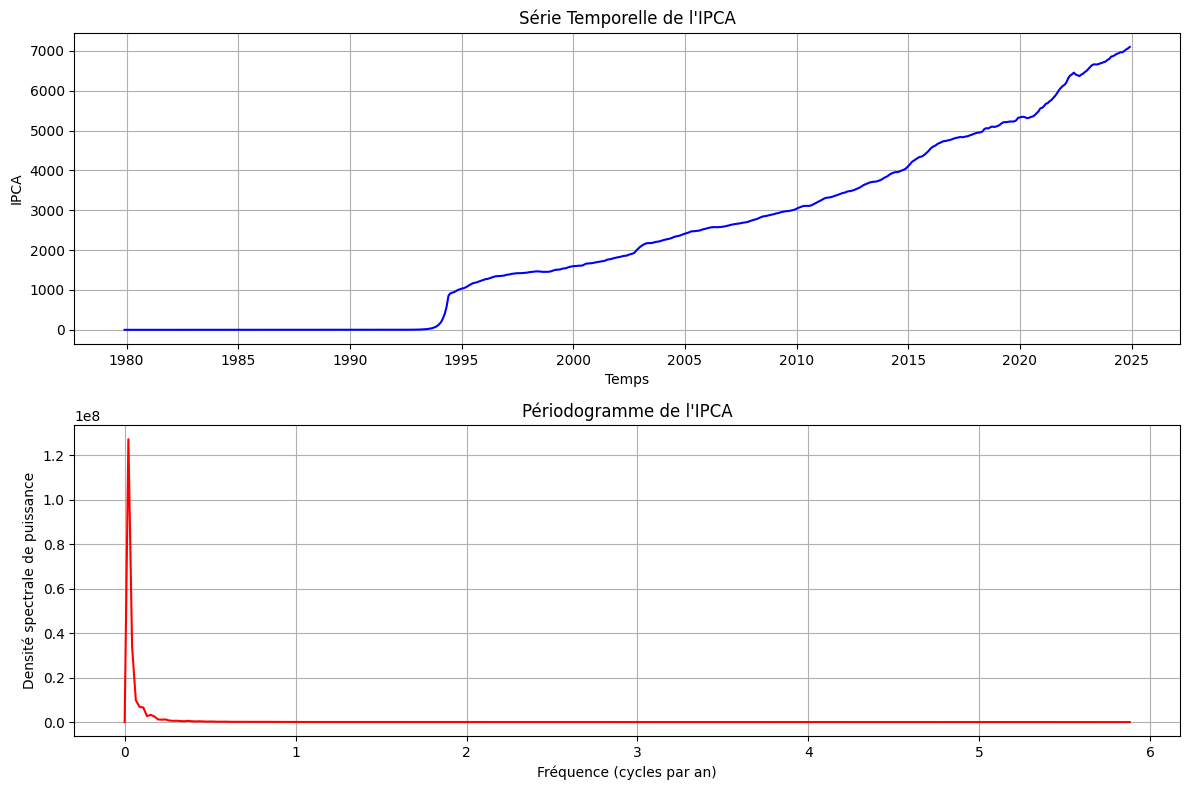

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Charger les données
df = pd.read_excel(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Class 1\Data\IPCA.xls",
                   sheet_name="IPCA", usecols="A:B", parse_dates=["DATA"])

# Vérifier les colonnes
print(df.columns)

# Trier les données par date
df = df.sort_values(by="DATA")

# Convertir en valeurs numériques (au cas où)
df["IPCA"] = pd.to_numeric(df["IPCA"], errors='coerce')
df = df.dropna(subset=["IPCA"])  # Supprimer les NaN

# Déterminer la fréquence d'échantillonnage (nombre de points par an)
df["delta_time"] = df["DATA"].diff().dt.days  # Différence en jours
fs = 365.25 / df["delta_time"].median()  # Fréquence en cycles par an

# Calculer le périodogramme
frequencies, power_spectrum = periodogram(df["IPCA"], fs=fs)

# Tracer la Time Series et le Périodogramme
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot de la Time Series
axs[0].plot(df["DATA"], df["IPCA"], color='b')
axs[0].set_title('Série Temporelle de l\'IPCA')
axs[0].set_xlabel('Temps')
axs[0].set_ylabel('IPCA')
axs[0].grid(True)

# Plot du Périodogramme
axs[1].plot(frequencies, power_spectrum, color='r')
axs[1].set_title('Périodogramme de l\'IPCA')
axs[1].set_xlabel('Fréquence (cycles par an)')
axs[1].set_ylabel('Densité spectrale de puissance')
axs[1].grid(True)

plt.tight_layout()
plt.show()


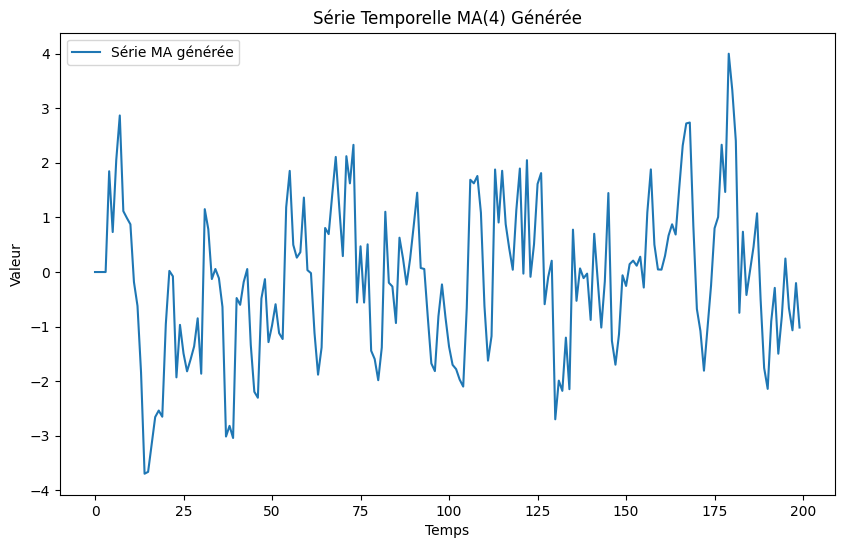

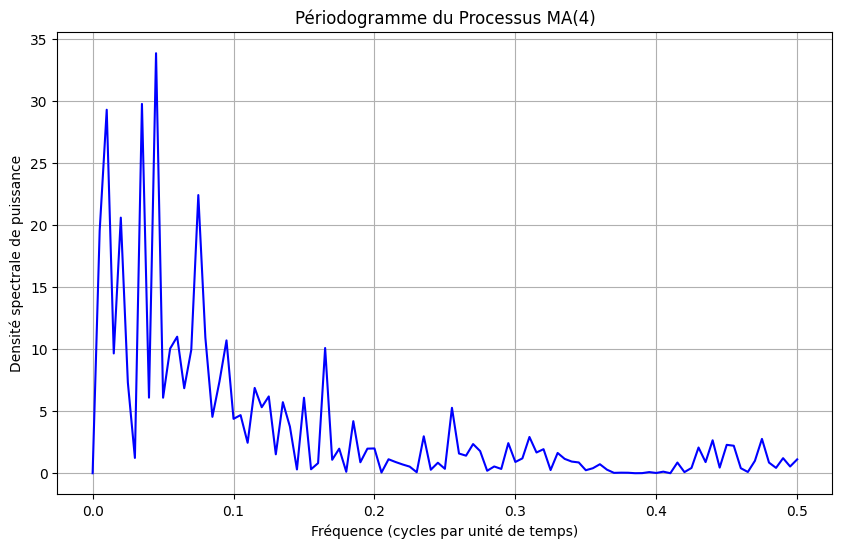

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Paramètres du processus MA(4)
np.random.seed(42)
n = 200  # Nombre de points
mu = 0  # Moyenne du processus
sigma = 1  # Écart-type du bruit blanc

q = 4  # Ordre du processus MA
theta = [0.9, 0.7, 0.3, 0.6]  # Coefficients MA

# Génération du bruit blanc
white_noise = np.random.normal(mu, sigma, n)

# Génération du processus MA(4)
ma_process = np.zeros(n)
for t in range(q, n):
    ma_process[t] = mu + white_noise[t] + sum(theta[i] * white_noise[t - i - 1] for i in range(q))

# Convertir en série pandas
time_series_ma = pd.Series(ma_process)

# Tracer la série temporelle MA
plt.figure(figsize=(10, 6))
plt.plot(time_series_ma, label="Série MA générée")
plt.title("Série Temporelle MA(4) Générée")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.show()

# Calculer le périodogramme
fs = 1  # Fréquence d'échantillonnage (1 observation par unité de temps)
frequencies, power_spectrum = periodogram(time_series_ma, fs=fs)

# Tracer le périodogramme
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum, color='b')
plt.title("Périodogramme du Processus MA(4)")
plt.xlabel("Fréquence (cycles par unité de temps)")
plt.ylabel("Densité spectrale de puissance")
plt.grid(True)
plt.show()


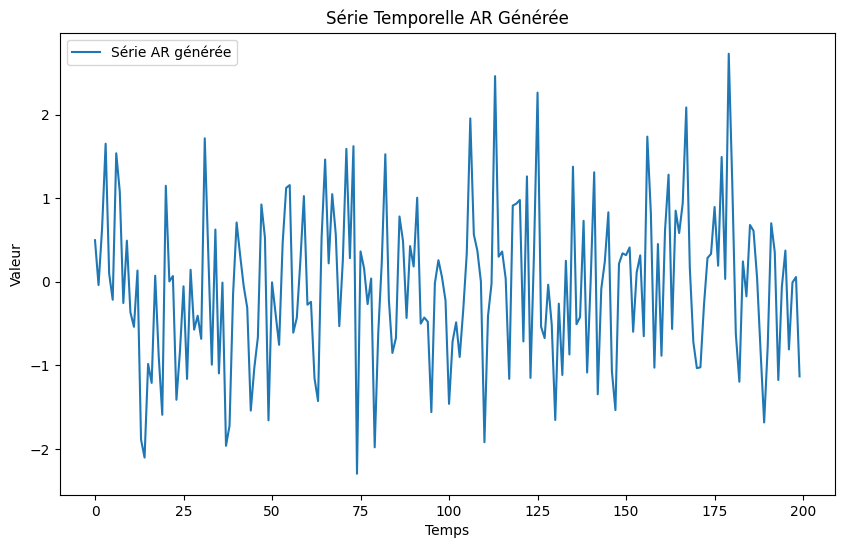

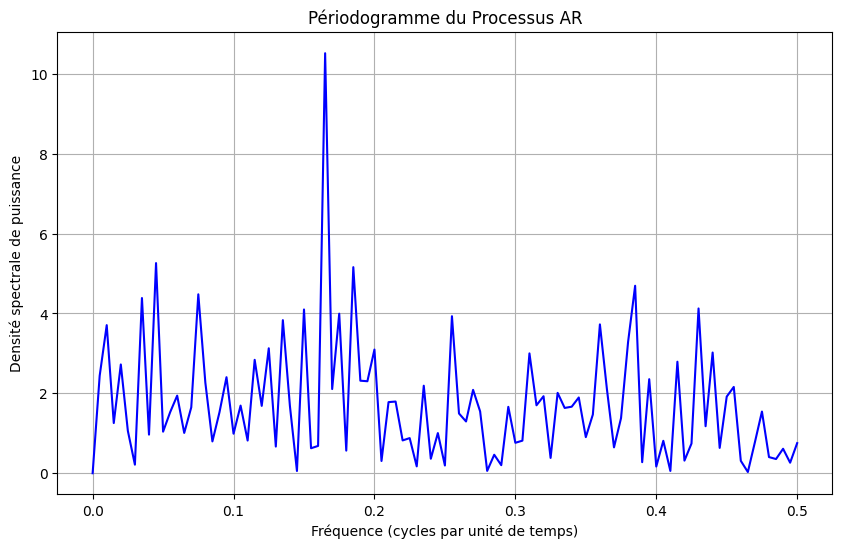

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Génération de la série temporelle AR(1)
np.random.seed(42)
n = 200  # Nombre de points
alpha2 = 0.2  # Coefficient AR
sigma = 1.0  # Écart-type du bruit
y = np.zeros(n)
y[0] = np.random.normal(0, sigma)  # Valeur initiale

for t in range(1, n):
    y[t] = alpha2 * y[t-1] + np.random.normal(0, sigma)

# Convertir en série pandas
time_series = pd.Series(y)

# Tracer la série temporelle AR
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Série AR générée")
plt.title("Série Temporelle AR Générée")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.show()

# Calculer le périodogramme
fs = 1  # Fréquence d'échantillonnage (1 observation par unité de temps)
frequencies, power_spectrum = periodogram(time_series, fs=fs)

# Tracer le périodogramme
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum, color='b')
plt.title("Périodogramme du Processus AR")
plt.xlabel("Fréquence (cycles par unité de temps)")
plt.ylabel("Densité spectrale de puissance")
plt.grid(True)
plt.show()
